# Bank Customers Churning Prediction - Machine Learning Modeling

#### Dataset link: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers?select=Churn_Modelling.csv

## 1. Data Preprocessing

### Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

### Data Exploration

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe(include='number')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Drop irrelevant columns

In [7]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dealing with Missing Data

In [9]:
df.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

### Encode Catergorical Data

In [10]:
df.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [11]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
df.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [14]:
df.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [15]:
df = pd.get_dummies(data=df, drop_first=True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Target Variable Countplot

In [17]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

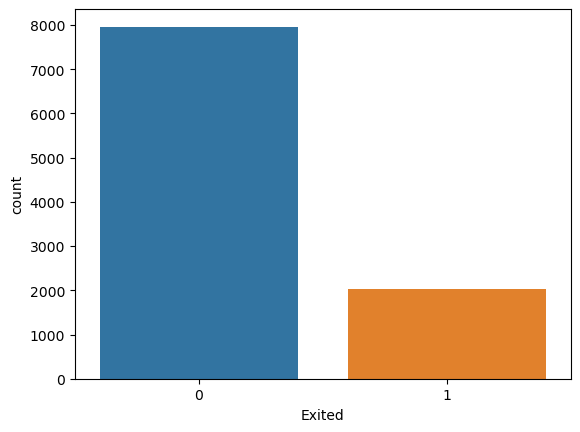

In [18]:
sns.countplot(data=df, x='Exited')
plt.show()

### Correlation Matrix and Heatmap

In [19]:
df2 = df.drop(columns='Exited')

<AxesSubplot:title={'center':'Correlated with Exited'}>

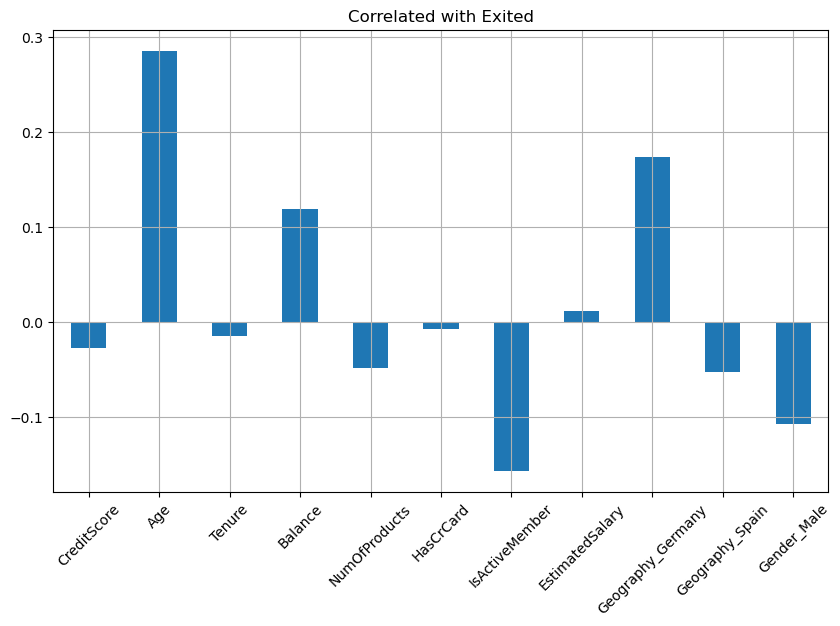

In [20]:
df2.corrwith(df.Exited).plot.bar(figsize=(10,6), grid=True, title="Correlated with Exited", rot=45)

In [21]:
corr = df.corr()

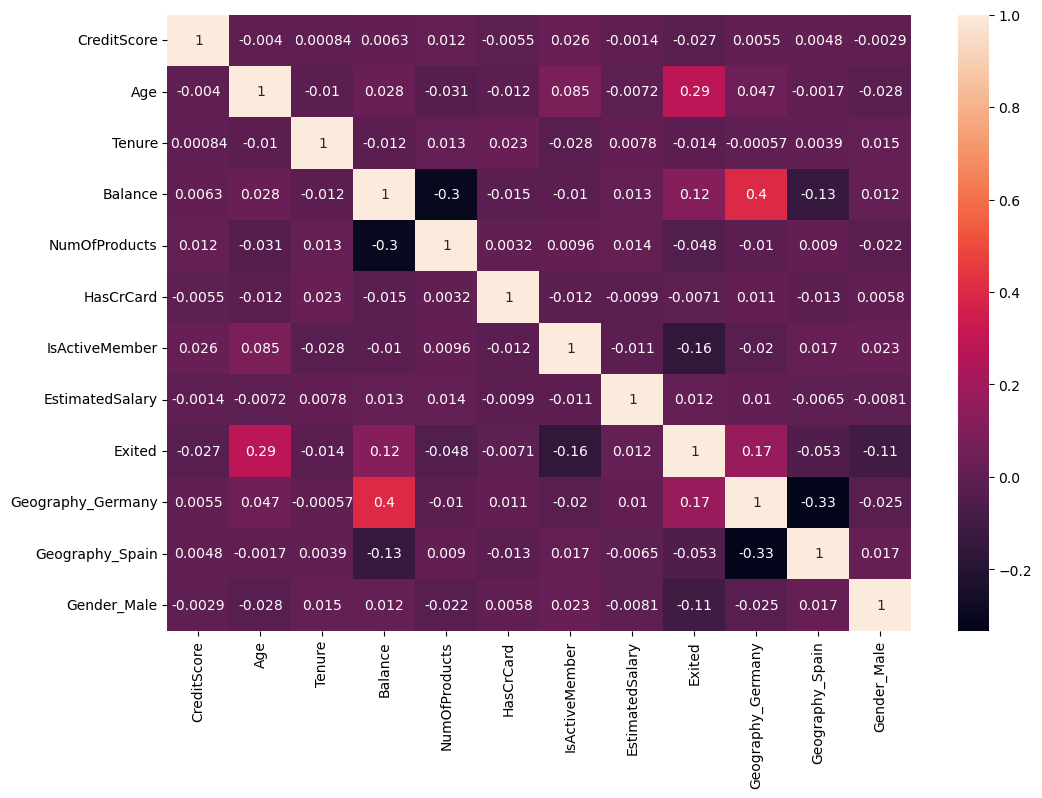

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)
plt.show()

### Split dataset into train and test sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Independent variables / Matrix of Features
x = df.drop(columns = 'Exited')

In [25]:
#Target variable
y = df.Exited

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
x_train.shape

(8000, 11)

In [28]:
y_train.shape

(8000,)

In [29]:
y_test.shape

(2000,)

In [30]:
x_test.shape

(2000, 11)

### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [33]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [34]:
x_train.mean()

8.167204286606152e-17

In [35]:
x_train.std()

1.0

In [36]:
x_test.mean()

2.503048273700353e-17

In [37]:
x_test.std()

1.0

## 2. Building ML Model

### 2.1. Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [40]:
y_pred = classifier_lr.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [42]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [43]:
results = pd.DataFrame([['Logistic Regression', acc, f1, pre, rec]], 
                       columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

In [44]:
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.813,0.315018,0.609929,0.212346


In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1540,   55],
       [ 319,   86]])

#### Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train, cv=10)
print("Accuracy mean is {:.2f} %".format(accuracies.mean()*100))
print("Accuracy std is {:.2f} %".format(accuracies.std()*100))

Accuracy mean is 80.84 %
Accuracy std is 0.88 %


### 2.2. Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
y_pred = classifier_rf.predict(x_test)

In [51]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [52]:
model_results = pd.DataFrame([['Random Forest', acc, f1, pre, rec]], 
                       columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

In [53]:
results = pd.concat([results, model_results])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8130,0.315018,0.609929,0.212346
0,Random Forest,0.8655,0.611833,0.736111,0.523457


In [54]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1519,   76],
       [ 193,  212]])

#### Cross Validation

In [55]:
accuracies = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train, cv=10)
print("Accuracy mean is {:.2f} %".format(accuracies.mean()*100))
print("Accuracy std is {:.2f} %".format(accuracies.std()*100))

Accuracy mean is 85.96 %
Accuracy std is 1.02 %


### 2.3. XGBoost

In [56]:
from xgboost import XGBClassifier

In [57]:
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
y_pred = classifier_xgb.predict(x_test)

In [59]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [60]:
model_results = pd.DataFrame([['XGBoost', acc, f1, pre, rec]], 
                       columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

In [61]:
results = pd.concat([results, model_results])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8130,0.315018,0.609929,0.212346
0,Random Forest,0.8655,0.611833,0.736111,0.523457
0,XGBoost,0.8505,0.593197,0.660606,0.538272


In [62]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1483,  112],
       [ 187,  218]])

In [63]:
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)
print("Accuracy mean is {:.2f} %".format(accuracies.mean()*100))
print("Accuracy std is {:.2f} %".format(accuracies.std()*100))

Accuracy mean is 85.24 %
Accuracy std is 1.22 %


### 3. Hyperparameter tuning - Randomized Search (XGBoost Classifier)

#### 3.1 XGBoost Classifier

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
parameters = {
    'lerning_rate': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    'max_dpth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
    'min_child,weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
    }
parameters

{'lerning_rate': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
 'max_dpth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'min_child,weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [66]:
random_search = RandomizedSearchCV(estimator=classifier_xgb, param_distributions = parameters, n_iter=100, 
                        n_jobs=-1, scoring='roc_auc', cv=5, verbose=3)

In [67]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[15:51:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 1/5] END colsample_bytree=0.7, gamma=0.0, lerning_rate=1.5, max_dpth=4, min_child,weight=1;, score=0.853 total time=   1.4s
[15:51:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 5/5] END colsample_bytree=0.7, gamma=0.0, lerning_rate=1.5, max_dpth=4, min_child,weight=1;, score=0.837 total time=   1.0s
[15:51:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 2/5] END colsample_bytr

[15:51:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 2/5] END colsample_bytree=0.7, gamma=0.0, lerning_rate=1.5, max_dpth=4, min_child,weight=1;, score=0.857 total time=   1.5s
[15:51:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 2/5] END colsample_bytree=0.3, gamma=0.3, lerning_rate=2.0, max_dpth=15, min_child,weight=3;, score=0.853 total time=   0.7s
[15:51:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, lerning_rate=2.0, max_dpth=15, min_child,we

[15:52:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, lerning_rate=0.5, max_dpth=6, min_child,weight=3;, score=0.856 total time=   0.6s
[15:52:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, lerning_rate=0.5, max_dpth=6, min_child,weight=3;, score=0.840 total time=   0.6s
[15:52:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 4/5] END colsample_bytree=0.7, gamma=0.3, lerning_rate=1.5, max_dpth=8, min_child,weig

[15:52:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, lerning_rate=1.5, max_dpth=4, min_child,weight=1;, score=0.840 total time=   0.7s
[15:52:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, lerning_rate=0.5, max_dpth=6, min_child,weight=3;, score=0.842 total time=   0.6s
[15:52:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 3/5] END colsample_bytree=0.7, gamma=0.3, lerning_rate=1.5, max_dpth=8, min_child,weig

[15:52:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, lerning_rate=1.5, max_dpth=4, min_child,weight=1;, score=0.844 total time=   0.7s
[15:52:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, lerning_rate=0.5, max_dpth=6, min_child,weight=3;, score=0.839 total time=   0.6s
[15:52:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 2/5] END colsample_bytree=0.7, gamma=0.3, lerning_rate=1.5, max_dpth=8, min_child,weig

[15:52:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, lerning_rate=0.5, max_dpth=6, min_child,weight=3;, score=0.850 total time=   0.6s
[15:52:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 1/5] END colsample_bytree=0.7, gamma=0.3, lerning_rate=1.5, max_dpth=8, min_child,weight=7;, score=0.854 total time=   1.0s
[15:52:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.

[CV 5/5] END colsample_bytree=0.7, gamma=0.3, lerning_rate=1.5, max_dpth=8, min_child,weig

[15:52:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "lerning_rate", "max_dpth", "min_child,weight" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [68]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              lerning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_dpth=5, max_leaves=None, min_child,weight=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, ...)

In [69]:
random_search.best_params_

{'min_child,weight': 3,
 'max_dpth': 5,
 'lerning_rate': 1.0,
 'gamma': 0.2,
 'colsample_bytree': 0.3}

In [70]:
random_search.best_score_

0.8481323134651205

#### 3.2 Random Forest Classifier

In [71]:
classifier_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [72]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
}
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'class_weight': ['balanced', 'balanced_subsample', None],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['sqrt', 'log2', None]}

In [73]:
random_search = RandomizedSearchCV(estimator=classifier_rf, param_distributions = parameters, n_iter=10, 
                        n_jobs=-1, scoring='roc_auc', cv=10, verbose=3)

In [74]:
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/pedrocerruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pedrocerruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pedrocerruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/pedrocerruti/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispat

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
 

In [75]:
random_search.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=500, random_state=0)

In [76]:
random_search.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 50,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [77]:
random_search.best_score_

0.8620536271211507

### 4. Final Model (Random Forest Classifier)

In [78]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

### 5. Predict Single Observation 

In [79]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [80]:
single_obs = [[619, 42, 2, 0.00, 1, 1, 1, 101348.88, 0, 0, 0]]

In [82]:
classifier.predict(sc.transform(single_obs))

/Users/pedrocerruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])